In [326]:
import pandas as pd
%pylab inline
import matplotlib.pylab as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [327]:
df_adv = pd.read_csv('/Users/mike/master/AI-HUB-ML-master/Data/Advertising.csv') # Read data

In [328]:
data_x = df_adv.TV[0:] # Get the TV budget
data_y = df_adv.sales[0:] # Get the sales

In [329]:
# Sort the array and get the values
idx = np.argsort(data_x).values

# Reorder the x and y data frames
data_x  = data_x.iloc[idx]

In [330]:
def find_nearest(array, xi):
    distance = array.copy()
    for i in range(len(array)):
        # Get the distdata frames
        distance.iloc[i] = abs(array.iloc[i] - xi)
        
    # Sort the dist data frames
    idx_dis = np.argsort(distance).values
    distance = distance.iloc[idx_dis]
        
    return distance

In [331]:
check_point = np.random.randint(0,290,8)
df_predict = pd.DataFrame(np.zeros((8,2)) * 0,columns=['x', 'y'])
for i in range(len(check_point)):
    get_dis = find_nearest(data_x,check_point[i])
    get_index = get_dis.index.values[0:3]
    get_value = np.array([data_y.iloc[get_index[0]], data_y.iloc[get_index[1]], data_y.iloc[get_index[2]]])
    
    df_predict.iloc[i][0] = check_point[i]
    df_predict.iloc[i][1] = get_value.sum()/3
df_predict = df_predict.sort_values(by = 'x')
pre_x = df_predict.x[0:]
pre_y = df_predict.y[0:]

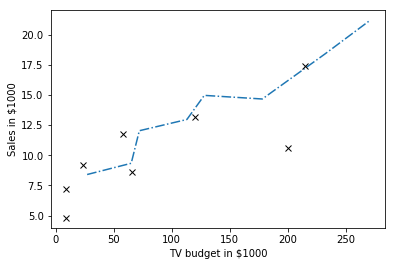

In [332]:
plt.plot(pre_x.values,pre_y.values, '-.') # Basic plotting with a dash-dot line
plt.plot(df_adv.TV[5:13], df_adv.sales[5:13], 'kx') # Plot the data points (black x markers)
plt.title('') # Leave title blank
plt.xlabel('TV budget in $1000') # Label the x-axis
plt.ylabel('Sales in $1000') # Label the y-axis

plt.savefig('nearest-neighbor.png',dpi=300) # save the figure